In [47]:
from math import e, pi
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('..')
from util.image import file2image
#from plotting import plot

In [2]:
data = file2image('../data/img01.png')

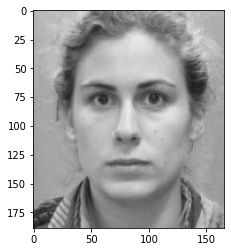

In [3]:
plt.imshow(data);

In [4]:
data = np.array(data)
s = data.shape

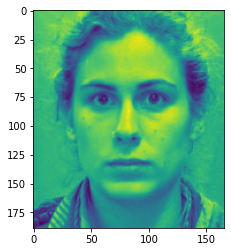

In [5]:
flat = np.array([[t[0] / 255 for t in row] for row in data])
plt.imshow(flat);

In [6]:
print(flat.shape)
flat[0, 0]

(189, 166)


0.7176470588235294

In [7]:
def imaginary(r, i):
    return r + (i * 1j)

In [8]:
THRESH = 0.5
S = [imaginary(i, j) for i in range(flat.shape[0]) 
     for j in range(flat.shape[1]) if flat[i, j] <= THRESH]

In [23]:
def plot(S, lim, **kwargs):
    reals = [x.real for x in S]
    imags = [x.imag for x in S]
    plt.scatter(reals, imags, **kwargs)
    plt.xlim([-lim, lim])
    plt.ylim([-lim, lim])
    plt.plot([-lim, lim], [0, 0], 'k-', alpha=0.5)
    plt.plot([0, 0], [-lim, lim], 'k-', alpha=0.5)
    plt.show()

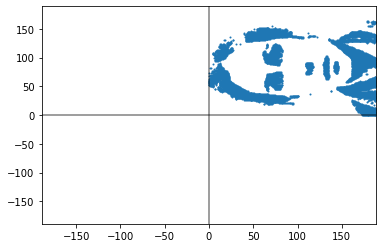

In [24]:
plot(S, 189, s=1)

In [25]:
def translate(S, z):
    return [x + z for x in S]

In [34]:
def rotate90(S, n=1):
    return [(0 + 1j ** n) * x for x in S]

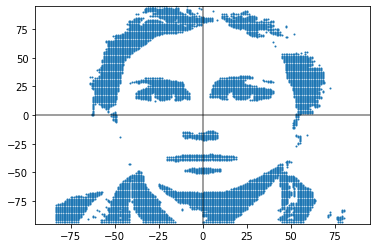

In [37]:
plot(rotate90(translate(S, (-95 - 83j)), 3), 95, s=1)

In [14]:
S == rotate90(S)

False

In [41]:
def plot_thresh(flat, thresh):
    S = [imaginary(i, j) for i in range(flat.shape[0]) 
         for j in range(flat.shape[1]) if flat[i, j] <= thresh]
    plot(rotate90(translate(S, (-95 - 83j)), 3), 95, s=1)

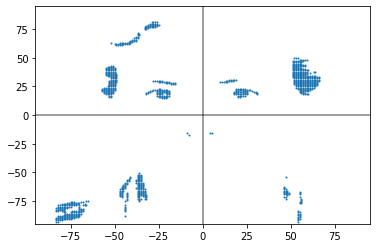

In [42]:
plot_thresh(flat, 0.25)

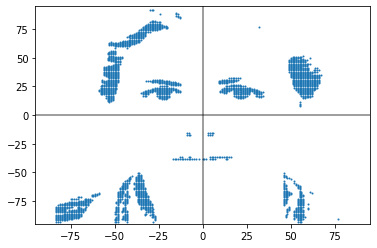

In [45]:
plot_thresh(flat, 0.33)

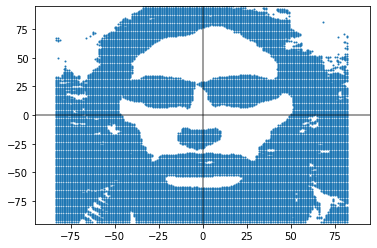

In [46]:
plot_thresh(flat, 0.67)

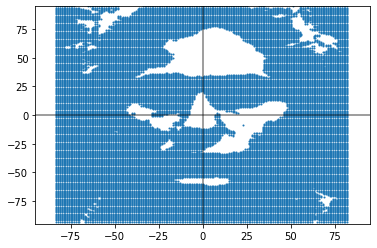

In [43]:
plot_thresh(flat, 0.75)